In [4]:
conda install -c conda-forge diffusers

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/salnabulsi/miniconda/envs/thesis-py38

  added / updated specs:
    - diffusers


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.24  |       h033912b_0         150 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    diffusers-0.3.0            |     pyhd8ed1ab_0          90 KB  conda-forge
    filelock-3.8.0             |     pyhd8ed1ab_0          13 KB  conda-forge
    huggingface_hub-0.10.0     |     pyhd8ed1ab_0         114 KB  conda-forge
    importlib-metadata-4.11.4  |   py38h50d1736_0          33 KB  conda-forge
    importlib_metadata-4.11.4  |       hd8ed1ab_0        

In [9]:
conda install transformers

Solving environment: done

## Package Plan ##

  environment location: /Users/salnabulsi/miniconda/envs/thesis-py38

  added / updated specs:
    - transformers


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    sacremoses-0.0.43          |     pyhd3eb1b0_0         284 KB
    tokenizers-0.11.4          |   py38h8776b5c_1         2.7 MB
    transformers-4.18.0        |   py38hecd8cb5_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         5.8 MB

The following NEW packages will be INSTALLED:

  sacremoses         pkgs/main/noarch::sacremoses-0.0.43-pyhd3eb1b0_0
  tokenizers         pkgs/main/osx-64::tokenizers-0.11.4-py38h8776b5c_1
  transformers       pkgs/main/osx-64::transformers-4.18.0-py38hecd8cb5_0

The following packages will be SUPERSEDED by a higher-priority channel:

  openssl            conda-for

In [3]:
conda install huggingface_hub

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
huggingface-cli login

SyntaxError: invalid syntax (1355118443.py, line 1)

In [1]:
from pathlib import Path
import click
import matplotlib.pyplot as plt

import PIL
from PIL import Image
import numpy as np

import torch
from torch import autocast
from tqdm.auto import tqdm

from diffusers import DDIMScheduler, PNDMScheduler
from diffusers import StableDiffusionPipeline
from diffusers import StableDiffusionImg2ImgPipeline

def dummy(images, **kwargs):
    return images, False

def nsfw(pipe):
    pipe.safety_checker = dummy


device = "cuda"
seed = 12315


def preprocess(image):
    w, h = image.size
    w, h = map(lambda x: x - x % 32, (w, h))  # resize to integer multiple of 32
    image = image.resize((w, h), resample=PIL.Image.LANCZOS)
    image = np.array(image).astype(np.float32) / 255.0
    image = image[None].transpose(0, 3, 1, 2)
    image = torch.from_numpy(image)
    return 2.*image - 1.

In [7]:
model_path = "CompVis/stable-diffusion-v1-4"

# Using DDIMScheduler as anexample,this also works with PNDMScheduler
# uncomment this line if you want to use it.

# scheduler = PNDMScheduler.from_config(model_path, subfolder="scheduler", use_auth_token=True)

scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False, set_alpha_to_one=False)
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    scheduler=scheduler,
    # revision="fp16", 
    # torch_dtype=torch.float16,
    use_auth_token=''
).to(device)

nsfw(pipe)

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


AssertionError: Torch not compiled with CUDA enabled

In [67]:
import ipywidgets as widgets
import io
from PIL import Image

uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

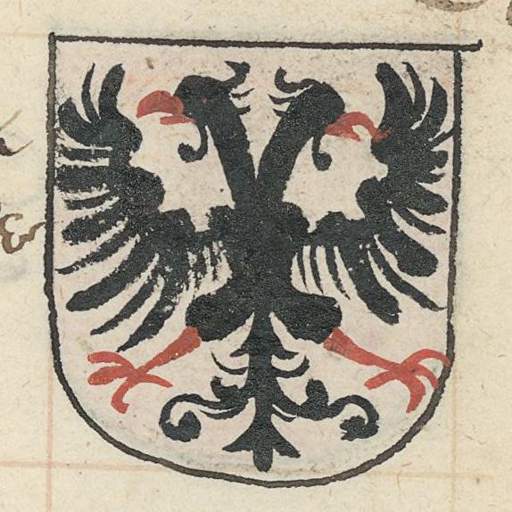

In [116]:
for name, file_info in uploader.value.items():
    img = Image.open(io.BytesIO(file_info['content'])).convert('RGB')
img = img.resize((512, 512))
img

In [118]:
for name, file_info in uploader.value.items():
    img = Image.open(io.BytesIO(file_info['content'])).convert('RGB')
img = img.resize((512, 512))


img = preprocess(img)
generator = torch.Generator(device=device).manual_seed(seed)

0it [00:00, ?it/s]

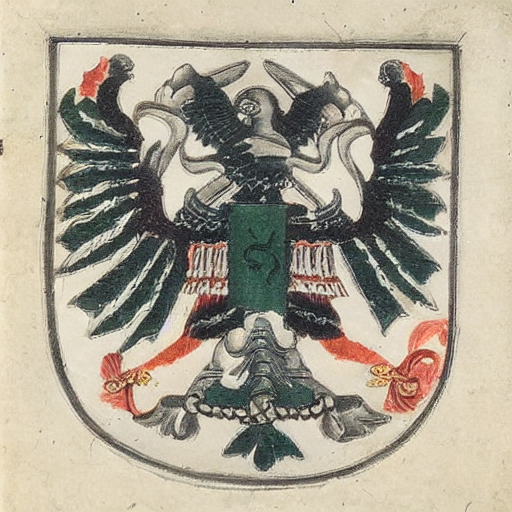

In [125]:
prompt = 'light green double headed eagle on '
'coat of arms on a page of a medieval heraldic pergament book,'
' in the style of game of thrones and the lord of the rings'
with autocast("cuda"):
    images = pipe(prompt=prompt, init_image=img, strength=0.55, guidance_scale=7.5, generator=generator)["sample"]

images[0]

In [126]:
images[-1].save(
            'out/'+'_'.join(prompt.split(' ')) + '.png'
        )